## 2024년 강서구 공모전 데이터 분석

공공데이터 및 수집 가능한 각종 민간 데이터를 활용하여, 강서구민의 불편사항 해결과 강서구 발전에 기여할 수 있는 빅데이터 분석 아이디어 (자유주제)

주요데이터: 공공데이터 포털(https://www.data.go.kr/) , kosis(https://kosis.kr/index/index.do)



### 주요 라이브러리 로드

In [1]:
import requests
import json
import xmltodict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
serviceKey = '6f6d4f6c7279643637377252654978'

In [3]:
import re


_illegal_xml_chars_RE = re.compile(u'[\x00-\x08\x0b\x0c\x0e-\x1F\uD800-\uDFFF\uFFFE\uFFFF]')
XML_PREDEFINED_ENTITIES = {
	"<": "&#60;",
	"&": "&#38;",
	">": "&#62;",
	"'": "&#39;",
	'"': "&#34;",
}

def escape_xml_illegal_chars(val, replacement='?'):
    return _illegal_xml_chars_RE.sub(replacement, val)

### 서울시 구별 인구수, 세대수, 1가구당 평균 인구수

In [5]:
#구별 인구수
df = pd.read_csv('data/주민등록인구.csv')
gu_population = df[['동별(2)', '2023 3/4.1']][3:]
gu_population['2023 3/4.1'] = gu_population['2023 3/4.1'].astype(int)
gu_population.sort_values(by='2023 3/4.1', ascending=False).head(5)

,동별(2),2023 3/4.1
26,송파구,661515
18,강서구,569978
25,강남구,546291
13,노원구,504423
23,관악구,500582


In [6]:
#세대수
gu_sedae = df[['동별(2)', '2023 3/4']][3:]
gu_sedae['2023 3/4'] = gu_sedae['2023 3/4'].astype(int)
gu_sedae.sort_values(by='2023 3/4', ascending=False).head(5)

,동별(2),2023 3/4
26,송파구,286123
23,관악구,286045
18,강서구,274249
25,강남구,238647
13,노원구,218367


In [7]:
gu_sedae_per = df[['동별(2)', '2023 4/4.10']][3:]
gu_sedae_per['2023 4/4.10'] = gu_sedae_per['2023 4/4.10'].astype(float)
gu_sedae_per.sort_values(by='2023 4/4.10', ascending=False).head(5)

,동별(2),2023 4/4.10
17,양천구,2.41
24,서초구,2.40
13,노원구,2.29
26,송파구,2.29
25,강남구,2.27


### 강서구 인구 분포도

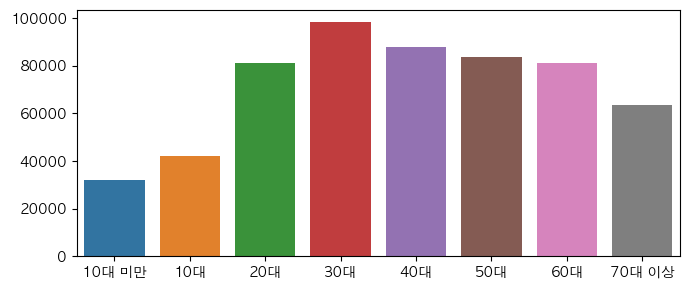

In [9]:

df_age = pd.read_csv('data/주민등록인구(연령별_동별)_강서구.csv')
df_age.columns = df_age.iloc[0]
df_age = df_age[1:]

se_age = df_age.iloc[0][:25][4:]
se_age = se_age.astype('int32')
se_age['10~14세'] + se_age['15~19세']
d= {
    '10대 미만': se_age['0~4세'] + se_age['5~9세'],
    '10대': se_age['10~14세'] + se_age['15~19세'] , '20대': se_age['20~24세'] + se_age['25~29세'], 
    '30대': se_age['30~34세'] + se_age['35~39세'], '40대': se_age['40~44세'] + se_age['45~49세'],
     '50대': se_age['50~54세'] + se_age['55~59세'], '60대': se_age['60~64세'] + se_age['65~69세'],
      '70대 이상':  se_age['70~74세'] + se_age['75~79세'] + se_age['80~84세'] + se_age['85~89세'] + se_age['90~94세'] + se_age['95~99세'] + se_age['100세 이상']}
se_age_df = pd.DataFrame.from_dict([d])

f, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'AppleGothic'
sns.barplot(data=se_age_df, errorbar=None, palette='tab10')
plt.tight_layout()
plt.show()

### 서울 구별 문화만족도 (상위 5개 구)

In [12]:
#서울시 구별 문화환경 만족도
culture_satifation = pd.read_csv('data/문화환경만족도.csv')
culture_satifation.columns = culture_satifation.iloc[0]
culture_satifation = culture_satifation[1:]

count = len(culture_satifation)

index = [i +1 for i in range(count)] 

#total['월_평균_소득_금액'] = total['월_평균_소득_금액'].apply(lambda d: (format(d, ',')))
culture_satifation.sort_values(by='문화환경 만족도(종합) (점)', ascending=False).set_index(pd.Index(index)).head(10)[['구분별(2)', '문화환경 만족도(종합) (점)', '문화시설 (점)', '문화프로그램 (점)',
 '문화비용 (점)']]

,구분별(2),문화환경 만족도(종합) (점),문화시설 (점),문화프로그램 (점),문화비용 (점)
1,종로구,6.43,6.82,6.69,5.77
2,은평구,6.34,7.15,6.61,5.26
3,성동구,6.22,6.81,6.42,5.42
4,송파구,6.12,6.72,6.26,5.39
5,동작구,6.12,6.91,6.44,5.02
6,동대문구,6.12,6.50,6.32,5.53
7,서대문구,6.04,6.63,6.30,5.17
8,강북구,6.02,6.53,6.28,5.24
9,강서구,5.91,6.33,6.09,5.31
10,마포구,5.90,6.76,6.10,4.84


### 서울시 구별 생활만족도

In [13]:
life_satisfaciton = pd.read_csv('data/생활환경만족도.csv')
life_satisfaciton.columns = life_satisfaciton.iloc[0]
life_satisfaciton = life_satisfaciton[1:]
life_satisfaciton.sort_values(by='종합', ascending=False).reset_index(drop=True).head(5)
#life_satisfaciton = life_satisfaciton.rename(columns={'구분별(2)':'행정동_코드_명'})
#
alls = life_satisfaciton.merge(culture_satifation, on="구분별(2)")
alls['종합'] = alls['종합'].astype('float')
alls = alls.rename(columns={'종합': '만족도'})
alls['문화환경 만족도(종합) (점)'] = alls['문화환경 만족도(종합) (점)'].astype('float')



In [14]:
life_satisfaciton.sort_values(by='종합', ascending=False).reset_index(drop=True).head(5)

,구분별(1),구분별(2),종합,주거환경,경제환경,사회환경,교육환경
0,지역소분류,노원구,7.87,8.51,7.31,7.84,7.82
1,지역소분류,서초구,7.27,7.62,7.15,7.22,7.08
2,지역소분류,송파구,6.91,7.58,6.72,6.71,6.63
3,지역소분류,강북구,6.86,7.72,6.70,6.65,6.37
4,지역소분류,서대문구,6.82,7.37,6.77,6.65,6.51


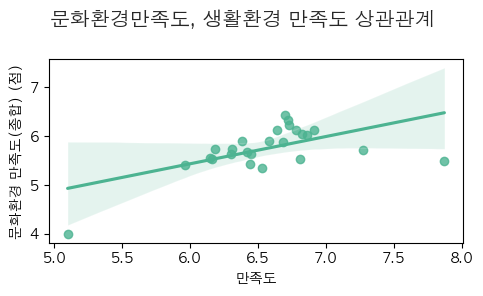

In [15]:
f, ax = plt.subplots(figsize=(5, 3))
sns.set_theme(style="ticks")
sns.regplot(x=alls['만족도'], y=alls['문화환경 만족도(종합) (점)'], color="#4CB391", ax=ax)
plt.rcParams['font.family'] = 'AppleGothic'
plt.suptitle('문화환경만족도, 생활환경 만족도 상관관계')

plt.tight_layout()
plt.show()

### 강서구 VS 송파구, 성동구, 동작구 인구 분포 상관관계

In [16]:
gangseo_df = pd.read_csv('data/주민등록인구(연령별_동별)_강서구.csv')
gangseo_df.columns = gangseo_df.iloc[0]
gangseo_df = gangseo_df[1:]
gangseo_age = gangseo_df.iloc[0][:25][4:]
d = { 'age': gangseo_age.index, 'count': gangseo_age.values}
gangseo_age_df = pd.DataFrame(data =d)
gangseo_age_df['count'] = gangseo_age_df['count'].astype(int)
gangseo_age_df.sort_values(by='count', ascending=False)

,age,count
6,30~34세,54766
5,25~29세,50895
8,40~44세,46609
10,50~54세,44492
12,60~64세,43833
7,35~39세,43708
9,45~49세,41197
11,55~59세,39276
13,65~69세,37324
4,20~24세,30154


In [17]:
songpa_df = pd.read_csv('data/주민등록인구(연령별_동별)_송파구.csv')

songpa_df.columns = songpa_df.iloc[0]
songpa_df = songpa_df[1:]

songpa_age = songpa_df.iloc[0][3:]


d = { 'age': songpa_age.index, 'count': songpa_age.values}
songpa_age_df = pd.DataFrame(data =d)
songpa_age_df['count'] = songpa_age_df['count'].astype(int)
songpa_age_df.sort_values(by='count', ascending=False)

,age,count
8,40~44세,57824
6,30~34세,55839
10,50~54세,54262
5,25~29세,51177
7,35~39세,50535
9,45~49세,49686
12,60~64세,48198
11,55~59세,47956
13,65~69세,42047
4,20~24세,34441


In [18]:
seongdong_df = pd.read_csv('data/주민등록인구(연령별_동별)_성동구.csv')

seongdong_df.columns = seongdong_df.iloc[0]
seongdong_df = seongdong_df[1:]
seongdong_age = seongdong_df.iloc[0][:25][4:]
d = { 'age': seongdong_age.index, 'count': seongdong_age.values}
seongdong_age_df = pd.DataFrame(data =d)
seongdong_age_df['count'] = seongdong_age_df['count'].astype(int)
seongdong_age_df.sort_values(by='count', ascending=False)

,age,count
5,25~29세,25407
6,30~34세,24660
10,50~54세,23558
8,40~44세,22558
7,35~39세,22239
11,55~59세,21719
12,60~64세,21567
4,20~24세,19102
9,45~49세,19071
13,65~69세,17347


In [19]:
dongjak_df = pd.read_csv('data/주민등록인구(연령별_동별)_동작구.csv')

dongjak_df.columns = dongjak_df.iloc[0]
dongjak_df = dongjak_df[1:]
dongjak_age = dongjak_df.iloc[0][:25][4:]
d = { 'age': dongjak_age.index, 'count': dongjak_age.values}
dongjak_age_df = pd.DataFrame(data =d)
dongjak_age_df['count'] = dongjak_age_df['count'].astype(int)
dongjak_age_df.sort_values(by='count', ascending=False)

,age,count
5,25~29세,40128
6,30~34세,34359
10,50~54세,30946
8,40~44세,29034
4,20~24세,28494
11,55~59세,27770
12,60~64세,27629
7,35~39세,27206
9,45~49세,26584
13,65~69세,23737


In [20]:
eunpyeong_df = pd.read_csv('data/주민등록인구(연령별_동별)_은평구.csv')

eunpyeong_df.columns = eunpyeong_df.iloc[0]
eunpyeong_df = eunpyeong_df[1:]
eunpyeong_age = eunpyeong_df.iloc[0][:25][4:]
d = { 'age': eunpyeong_age.index, 'count': eunpyeong_age.values}
eunpyeong_age_df = pd.DataFrame(data =d)
eunpyeong_age_df['count'] = eunpyeong_age_df['count'].astype(int)
eunpyeong_age_df.sort_values(by='count', ascending=False)

,age,count
10,50~54세,41754
12,60~64세,37823
5,25~29세,36705
8,40~44세,36513
11,55~59세,36283
6,30~34세,36219
9,45~49세,35028
13,65~69세,31309
7,35~39세,31039
4,20~24세,26143


In [21]:
jongro_df = pd.read_csv('data/주민등록인구(연령별_동별)_종로구.csv')

jongro_df.columns = jongro_df.iloc[0]
jongro_df = jongro_df[1:]
jongro_age = jongro_df.iloc[0][:25][4:]
d = { 'age': jongro_age.index, 'count': jongro_age.values}
jongro_age_df = pd.DataFrame(data =d)
jongro_age_df['count'] = jongro_age_df['count'].astype(int)
jongro_age_df.sort_values(by='count', ascending=False)

,age,count
5,25~29세,14590
10,50~54세,12974
4,20~24세,12793
11,55~59세,11837
12,60~64세,11768
6,30~34세,11692
8,40~44세,10415
9,45~49세,10152
13,65~69세,9375
7,35~39세,9274


In [22]:
#소득, 나이 

gangseo_age_df['count'].corr(songpa_age_df['count']) , gangseo_age_df['count'].corr(seongdong_age_df['count']), gangseo_age_df['count'].corr(dongjak_age_df['count']),gangseo_age_df['count'].corr(eunpyeong_age_df['count']), gangseo_age_df['count'].corr(jongro_age_df['count'])

(0.985831074407723,
 0.9859873661331019,
 0.9764408937405122,
 0.9752920464619347,
 0.9412942359270677)

/Users/chahyeon-yeong/miniconda3/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'ratio'
  cset = contour_func(
/Users/chahyeon-yeong/miniconda3/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'ratio'
  cset = contour_func(
/Users/chahyeon-yeong/miniconda3/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'ratio'
  cset = contour_func(
/Users/chahyeon-yeong/miniconda3/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'ratio'
  cset = contour_func(
/Users/chahyeon-yeong/miniconda3/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'ratio'
  cset = contour_func(
/var/folders/k0/3_5q7r6s2lxfhbpphpjk82hw0000gn/T/ipykernel_4618/2090778295.py:27

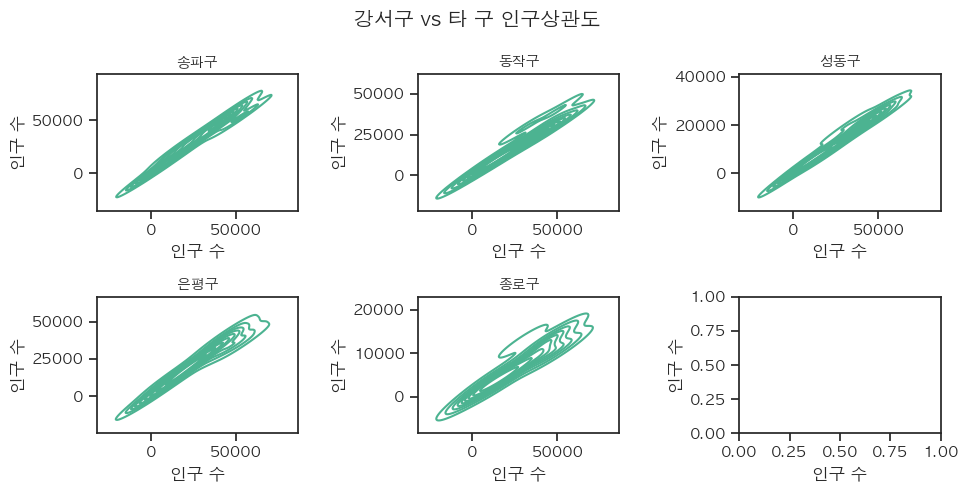

In [25]:
# corr
f, ax = plt.subplots(2, 3, figsize=(10, 5))
sns.set_theme(style="ticks")
cmap = sns.cubehelix_palette(start=1, light=1, as_cmap=True)
sns.kdeplot(x=gangseo_age_df['count'], y=songpa_age_df['count'], color="#4CB391", ratio=3, ax=ax[0][0])
ax[0][0].set_title('송파구', fontsize='small')
sns.kdeplot(x=gangseo_age_df['count'], y=dongjak_age_df['count'], color="#4CB391", ratio=3, ax=ax[0][1])
ax[0][1].set_title('동작구', fontsize='small')
sns.kdeplot(x=gangseo_age_df['count'], y=seongdong_age_df['count'], color="#4CB391", ratio=3, ax=ax[0][2])
ax[0][2].set_title('성동구', fontsize='small')

sns.kdeplot(x=gangseo_age_df['count'], y=eunpyeong_age_df['count'], color="#4CB391", ratio=3, ax=ax[1][0])
ax[1][0].set_title('은평구', fontsize='small')

sns.kdeplot(x=gangseo_age_df['count'], y=jongro_age_df['count'], color="#4CB391", ratio=3, ax=ax[1][1])
ax[1][1].set_title('종로구', fontsize='small')


plt.rcParams['font.family'] = 'AppleGothic'
plt.suptitle('강서구 vs 타 구 인구상관도')

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("인구 수")
        ax[i][j].set_ylabel("인구 수")

plt.tight_layout()
plt.show()

### 서울시 문화공간정보

In [26]:
url = 'http://openapi.seoul.go.kr:8088/{}/xml/culturalSpaceInfo/1/1000'.format(serviceKey)
response = requests.get(url)
rawdata = response.text
cleaned_data = escape_xml_illegal_chars(rawdata)
jsonString = json.dumps(xmltodict.parse(cleaned_data), indent=4, ensure_ascii=False)
dict_obj = json.loads(jsonString)
culture_spot = pd.DataFrame(data= dict_obj['culturalSpaceInfo']['row'])

culture_spot['해당구'] = culture_spot['ADDR'].str.extract('( \w*시 )|( \w*구 )')[1].str.strip()
culture_spot['ADDR'].str.extract('( \w*시)')


,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
969,NaN
970,서울시
971,NaN
972,NaN


In [27]:
culture_spot[['SUBJCODE','FAC_NAME','ADDR','해당구']]

,SUBJCODE,FAC_NAME,ADDR,해당구
0,기타,경희대학교,서울특별시 동대문구 경희대로 26,동대문구
1,기타,DDP(동대문디자인플라자),서울특별시 중구 을지로 281,중구
2,공연장,우란2경,서울특별시 성동구 연무장7길 11,성동구
3,도서관,구립은평뉴타운도서관,서울특별시 은평구 진관2로 111-51,은평구
4,문화예술회관,노원문화예술회관,서울특별시 노원구 중계로 181,노원구
...,...,...,...,...
969,기타,중랑캠핑숲,서울특별시 중랑구 송림길 172,중랑구
970,기타,서울시립대학교,서울특별시 동대문구 서울시립대로 163,동대문구
971,박물관/기념관,동국대학교 박물관,서울특별시 중구 필동로1길 30,중구
972,기타,정동제일교회,서울특별시 중구 정동길 46,중구


### 강서구와 비교 대상인 송파구, 동작구, 성동구 문화시설 정보

In [28]:
#구별 전체 시설 수, 공연장, 기타, 박물관/기념관 수 비교 
compared_gu =['송파구','동작구','강서구','성동구']
cultures = culture_spot[culture_spot['해당구'].isin(compared_gu)][['SUBJCODE','FAC_NAME','ADDR','해당구']]
cultures[cultures['해당구'] == '송파구'].sort_values(by='SUBJCODE')


,SUBJCODE,FAC_NAME,ADDR,해당구
216,공연장,롯데콘서트홀,서울특별시 송파구 올림픽로 300,송파구
499,공연장,샤롯데씨어터,서울특별시 송파구 올림픽로 240,송파구
45,공연장,롯데월드 가든스테이지,서울특별시 송파구 올림픽로 240,송파구
338,공연장,롯데월드 시네마,서울특별시 송파구 올림픽로 300,송파구
82,공연장,우리금융아트홀,서울특별시 송파구 올림픽로 424,송파구
783,공연장,석촌호수 아뜰리에,서울특별시 송파구 석촌호수로 191 석촌호수 아뜰리에,송파구
138,공연장,석촌호수 아뜰리에,서울특별시 송파구 석촌호수로 191,송파구
557,공연장,서울놀이마당,서울특별시 송파구 잠실로 124,송파구
908,기타,올림픽공원,서울특별시 송파구 올림픽로 424,송파구
379,기타,서울역사편찬원,서울 송파구 방이동 88-3,송파구


In [29]:
cultures[cultures['해당구'] == '성동구'].sort_values(by='SUBJCODE')

,SUBJCODE,FAC_NAME,ADDR,해당구
2,공연장,우란2경,서울특별시 성동구 연무장7길 11,성동구
798,공연장,성수문화예술마당,서울 성동구 성수동1가 683,성동구
585,공연장,STUDIO301,"서울특별시 성동구 서울숲길 36, 3F Studio301",성동구
503,공연장,소월아트홀,서울 성동구 왕십리로 281 성동문화회관,성동구
78,공연장,성수아트홀,서울 성동구 성수동1가 656-323,성동구
928,공연장,서울숲야외무대,서울특별시 성동구 뚝섬로 273,성동구
346,기타,장안평 자동차산업 종합정보센터,서울특별시 성동구 자동차시장1길 64,성동구
378,기타,언더스탠드에비뉴,서울특별시 성동구 왕십리로 63,성동구
923,기타,서울숲 생활문화센터,서울 성동구 성수동1가 685-63,성동구
618,기타,성동청소년문화의집,서울 성동구 금호동3가 1266,성동구


[Text(0, 0.5, '문화시설 수'), Text(0.5, 0, '전체 문화시설')]

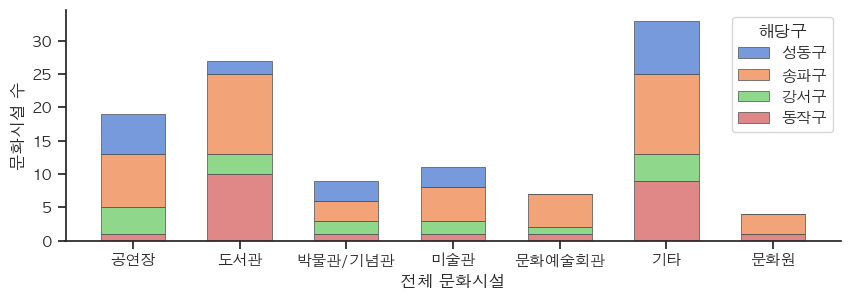

In [30]:
import matplotlib as mpl
plt.rcParams['font.family'] = 'AppleGothic'
f, ax = plt.subplots(figsize=(10, 3), label="비교구")
sns.despine(f)

sns.histplot(cultures, x="SUBJCODE", hue="해당구", multiple="stack", palette="muted", edgecolor=".3",
    linewidth=.5, shrink=0.6)
ax.set(ylabel="문화시설 수",
       xlabel="전체 문화시설")

In [31]:
culture_spot[culture_spot['해당구'] == '강서구'][['SUBJCODE','FAC_NAME','ADDR','HOMEPAGE']].sort_values(by='SUBJCODE').reset_index(drop=True)

,SUBJCODE,FAC_NAME,ADDR,HOMEPAGE
0,공연장,스카이아트홀,서울특별시 강서구 화곡로63길 65 B1,https://skyarthall.modoo.at/
1,공연장,LG아트센터 서울,서울특별시 강서구 마곡중앙로 136,http://www.lgart.com
2,공연장,서울강서문화원,서울특별시 강서구 가로공원로 195,http://www.kcc2000.or.kr
3,공연장,강서아트리움,서울특별시 강서구 가로공원로 195,https://culture.gangseo.seoul.kr/gsfc/main/con...
4,기타,국립국어원 우리말 꿈터,서울특별시 강서구 금낭화로 154,https://www.korean.go.kr/
5,기타,등촌지역정보센터,서울특별시 강서구 화곡로63길 96,https://www.gangseo.seoul.kr/reserve/re010401
6,기타,엑셈,서울특별시 강서구 마곡중앙8로5길 40,https://www.ex-em.com/
7,기타,서울식물원,서울특별시 강서구 마곡동로 161,https://botanicpark.seoul.go.kr/
8,도서관,아리향기작은도서관,서울특별시 강서구 양천로67가길 63,https://lib.gangseo.seoul.kr/SmallLibrary
9,도서관,강서구립길꽃어린이도서관,서울특별시 강서구 금낭화로24길 5,https://gilkkot.gangseo.seoul.kr/


In [32]:
culture_spot[culture_spot['해당구'] == '은평구'][['SUBJCODE','FAC_NAME', 'ADDR', 'HOMEPAGE' ]].sort_values(by='SUBJCODE').reset_index(drop=True)

,SUBJCODE,FAC_NAME,ADDR,HOMEPAGE
0,공연장,은평문화예술회관,서울특별시 은평구 녹번로 16,https://www.efac.or.kr
1,공연장,수색동 주민센터(다목적실),서울 은평구 수색로 280 (수색동) 수색동 자치회관,https://www.eshare.go.kr/UserPortal/Upv/UprRes...
2,공연장,서울특별시 청년허브,서울특별시 은평구 통일로 684,https://youthhub.kr/
3,기타,은평한옥마을어울림터,서울특별시 은평구 연서로48길 74,https://museum.ep.go.kr/experience/village.asp
4,기타,카페 쓸,서울 은평구 통일로 684 서울혁신파크 안 정문쪽,https://www.instagram.com/__ssssl__/
5,기타,은평구평생학습관,서울특별시 은평구 서오릉로 87 은평구평생학습관,http://edu.eunpyeong.go.kr/
6,기타,서울기록원,서울특별시 은평구 통일로62길 7,https://archives.seoul.go.kr/
7,기타,제1서울창의예술교육센터,서울특별시 은평구 가좌로 208,http://www.sen.go.kr/crezone1/
8,기타,은평구청소년문화의집 신나는애프터센터,"서울특별시 은평구 연서로6길 7 (역촌동, 은평구청소년문화의집)",http://www.epyouth.org/
9,기타,맛동,서울특별시 은평구 녹번동 5-29,https://www.seoulnutri.co.kr/


In [33]:
songpa_culture_spot = culture_spot[culture_spot['해당구'] == '송파구']
songpa_culture_spot[['SUBJCODE','FAC_NAME', 'ADDR', 'HOMEPAGE' ]].sort_values(by='SUBJCODE').reset_index(drop=True)

,SUBJCODE,FAC_NAME,ADDR,HOMEPAGE
0,공연장,롯데콘서트홀,서울특별시 송파구 올림픽로 300,https://www.lotteconcerthall.com/kor
1,공연장,샤롯데씨어터,서울특별시 송파구 올림픽로 240,http://www.charlottetheater.co.kr
2,공연장,롯데월드 가든스테이지,서울특별시 송파구 올림픽로 240,http://www.lotteworld.com
3,공연장,롯데월드 시네마,서울특별시 송파구 올림픽로 300,https://www.lottecinema.co.kr/NLCHS
4,공연장,우리금융아트홀,서울특별시 송파구 올림픽로 424,http://www.olympicpark.co.kr/
5,공연장,석촌호수 아뜰리에,서울특별시 송파구 석촌호수로 191 석촌호수 아뜰리에,https://blog.naver.com/art_space_sla
6,공연장,석촌호수 아뜰리에,서울특별시 송파구 석촌호수로 191,https://blog.naver.com/art_space_sla
7,공연장,서울놀이마당,서울특별시 송파구 잠실로 124,https://korean.visitseoul.net/entertainment/%E...
8,기타,올림픽공원,서울특별시 송파구 올림픽로 424,https://www.ksponco.or.kr/olympicpark/
9,기타,서울역사편찬원,서울 송파구 방이동 88-3,history.seoul.go.kr


### 서울시민 하고싶은 여가활동 구별 통계

In [34]:
df = pd.read_csv('data/하고싶은여가활동.csv')
df.columns = df.iloc[0]
df =df[1:]
df['기타']= df['기타'].replace('-', 0)

df = df.astype({'여행 야외 나들이':float, '영상시청':float, '문화예술관람':float, '운동':float, '휴식':float, '종교활동':float, '문화예술참여활동':float, '컴퓨터 게임 인터넷 검색 등':float, '운동경기관람':float, '사회봉사활동':float, '독서':float, '기타': float})
lesuire_df = pd.DataFrame(data = df)
mask = (lesuire_df['구분별(2)'] == '강서구')
lesuire_df.loc[mask,'구분별(1)'] = '강서구'

In [35]:
lesuire_df[lesuire_df['구분별(1)'] == '연령별']
lesuire_df = lesuire_df.rename(columns={'구분별(2)':'세대'})
#lesuire_df
lesuire_df[lesuire_df['구분별(1)'] == '연령별']

,구분별(1),세대,여행 야외 나들이,영상시청,문화예술관람,운동,휴식,종교활동,문화예술참여활동,컴퓨터 게임 인터넷 검색 등,운동경기관람,사회봉사활동,독서,기타
4,연령별,10대,27.6,5.9,14.2,9.0,4.7,4.6,3.1,20.0,5.4,4.3,1.2,0.0
5,연령별,20대,34.9,6.6,12.6,11.1,2.0,6.1,2.8,10.6,5.9,6.1,1.3,0.0
6,연령별,30대,40.1,8.5,10.4,10.6,3.6,6.6,2.9,7.3,5.6,3.7,0.8,0.0
7,연령별,40대,38.4,8.6,9.6,12.3,3.1,7.5,3.3,4.4,7.6,3.6,1.3,0.1
8,연령별,50대,36.8,9.9,7.9,12.8,4.1,10.9,2.8,3.2,5.6,4.6,1.4,0.0
9,연령별,60대 이상,28.4,15.3,5.7,14.7,3.9,16.3,2.7,2.7,4.2,4.3,1.8,0.1


In [36]:
lesuire_df[lesuire_df['구분별(1)'] == '강서구']

,구분별(1),세대,여행 야외 나들이,영상시청,문화예술관람,운동,휴식,종교활동,문화예술참여활동,컴퓨터 게임 인터넷 검색 등,운동경기관람,사회봉사활동,독서,기타
42,강서구,강서구,35.3,8.3,4.5,16.9,4.4,9.3,4.0,6.1,6.6,2.2,2.2,0.1


/var/folders/k0/3_5q7r6s2lxfhbpphpjk82hw0000gn/T/ipykernel_4618/3530296823.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "여행 야외 나들이", palette="light:m_r",linewidth=.5, ax=ax[0][0], markers=True)
/var/folders/k0/3_5q7r6s2lxfhbpphpjk82hw0000gn/T/ipykernel_4618/3530296823.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "운동", palette="light:m_r", linewidth=.5, ax=ax[0][1])
/var/folders/k0/3_5q7r6s2lxfhbpphpjk82hw0000gn/T/ipykernel_4618/3530296823.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "종교활동", palette="light:m_r", linewidth=.5, ax=ax[1][0])
/var/folders/k0/3_5q7r6s2lxfhbpphpjk82hw0000gn/T/ipykernel_4618/3530296823.py:9: UserWarning: Ignoring `palette` because

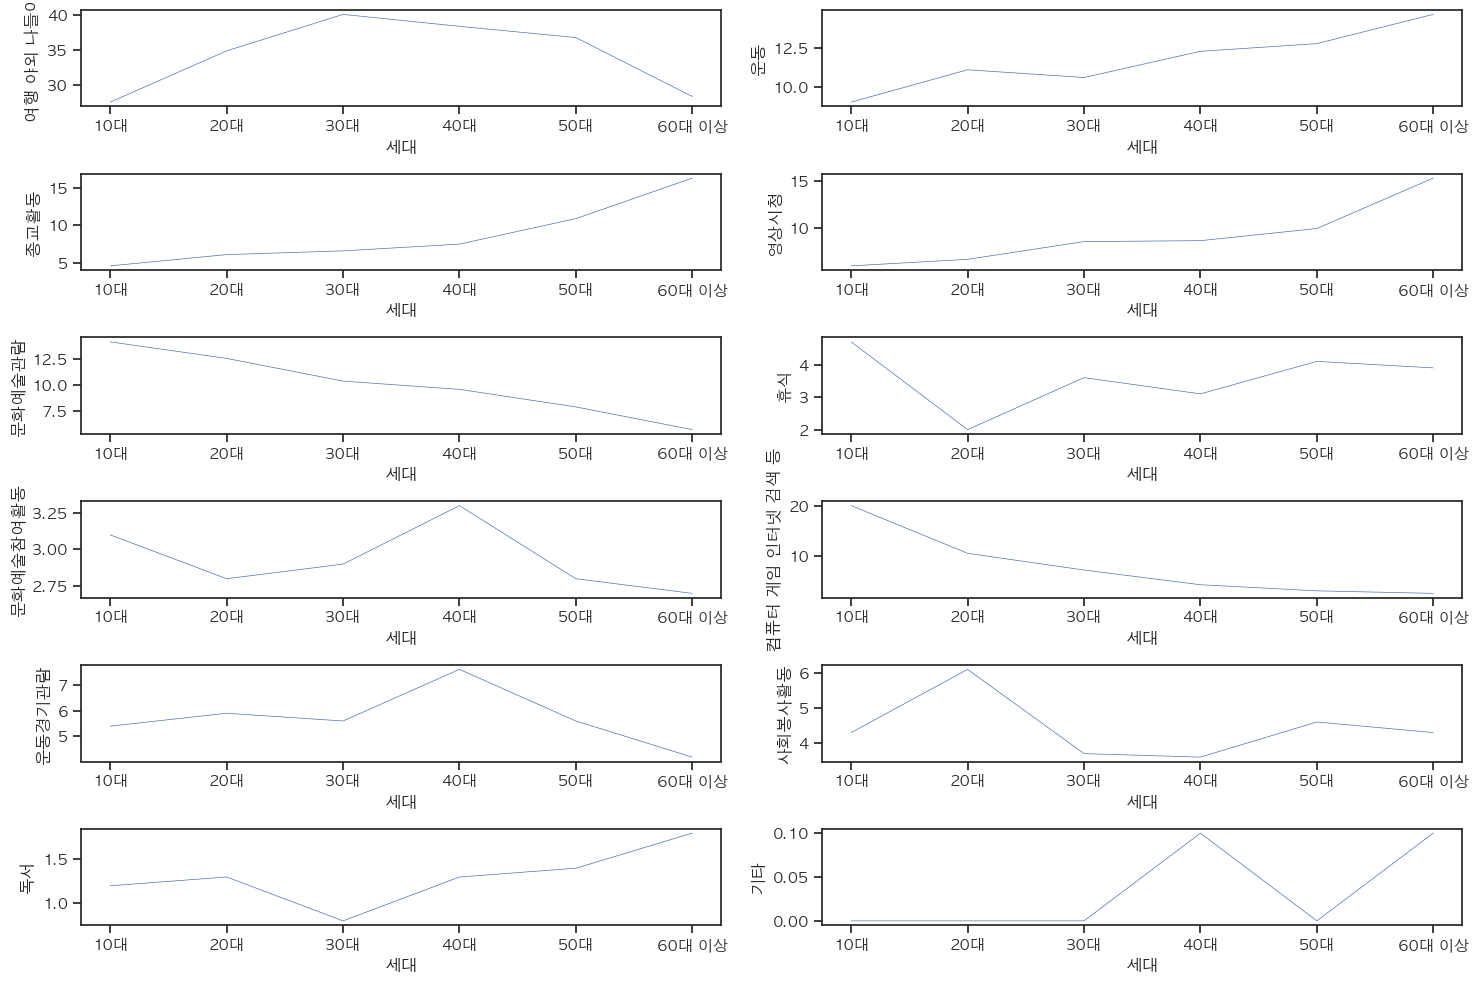

In [37]:
sns.set_theme(style="ticks")
plt.rcParams['font.family'] = 'AppleGothic'
f, ax = plt.subplots(6, 2, figsize=(15, 10))


sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "여행 야외 나들이", palette="light:m_r",linewidth=.5, ax=ax[0][0], markers=True)
sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "운동", palette="light:m_r", linewidth=.5, ax=ax[0][1])
sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "종교활동", palette="light:m_r", linewidth=.5, ax=ax[1][0])
sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "영상시청", palette="light:m_r", linewidth=.5, ax=ax[1][1])
sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "문화예술관람", palette="light:m_r", linewidth=.5, ax=ax[2][0])

sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "휴식", palette="light:m_r", linewidth=.5, ax=ax[2][1])
sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "문화예술참여활동", palette="light:m_r", linewidth=.5, ax=ax[3][0])
sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "컴퓨터 게임 인터넷 검색 등", palette="light:m_r", linewidth=.5, ax=ax[3][1])
sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "운동경기관람", palette="light:m_r", linewidth=.5, ax=ax[4][0])
sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "사회봉사활동", palette="light:m_r", linewidth=.5, ax=ax[4][1])
sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "독서", palette="light:m_r", linewidth=.5, ax=ax[5][0])
sns.lineplot(data=lesuire_df[lesuire_df['구분별(1)'] == '연령별'], x="세대", y= "기타", palette="light:m_r", linewidth=.5, ax=ax[5][1])

plt.tight_layout()
plt.show()

[Text(0, 0.5, '(%)'), Text(0.5, 0, '여가활동')]

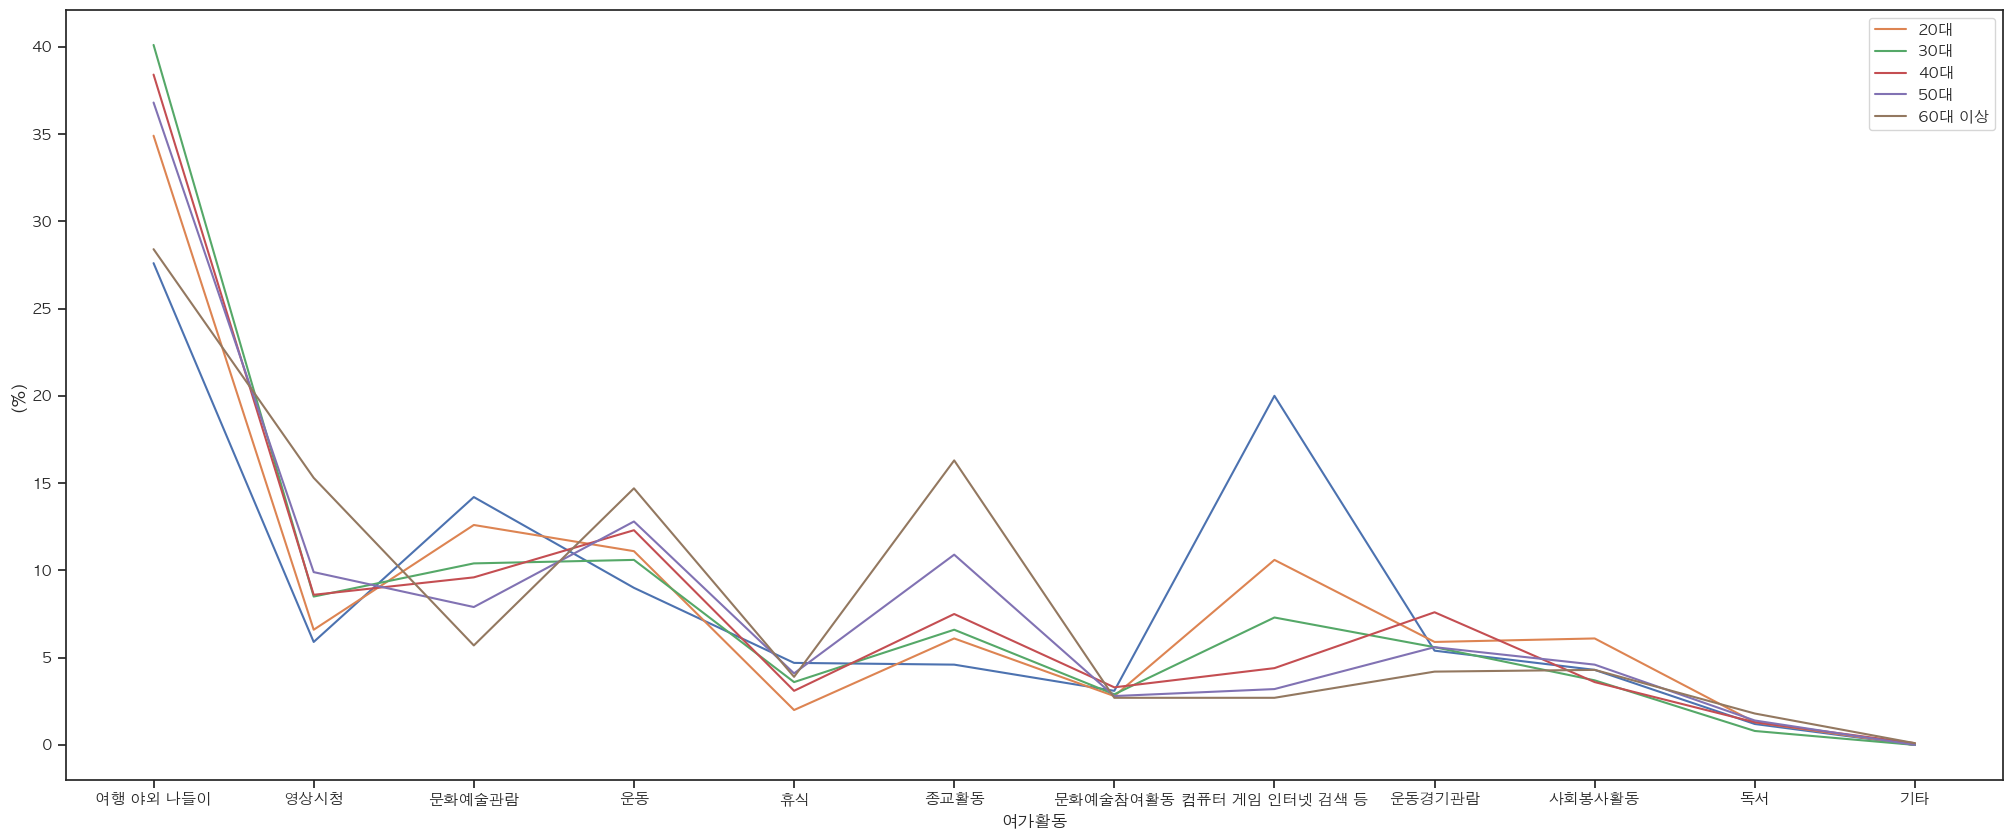

In [39]:
# 나이 기준 
cols = lesuire_df.columns[2:]
#
lesuire_df[lesuire_df['세대'] == '10대'].iloc[0,2:].values

sns.set_theme(style="ticks")
plt.rcParams['font.family'] = 'AppleGothic'
f, ax = plt.subplots(figsize=(25, 10))


sns.lineplot(x=cols, y=lesuire_df[lesuire_df['세대'] == '10대'].iloc[0,2:].values, ax=ax)



sns.lineplot(x=cols, y=lesuire_df[lesuire_df['세대'] == '20대'].iloc[0,2:].values, label='20대', ax=ax)
sns.lineplot(x=cols, y=lesuire_df[lesuire_df['세대'] == '30대'].iloc[0,2:].values, label='30대', ax=ax)
sns.lineplot(x=cols, y=lesuire_df[lesuire_df['세대'] == '40대'].iloc[0,2:].values, label='40대', ax=ax)
sns.lineplot(x=cols, y=lesuire_df[lesuire_df['세대'] == '50대'].iloc[0,2:].values, label='50대', ax=ax)
sns.lineplot(x=cols, y=lesuire_df[lesuire_df['세대'] == '60대 이상'].iloc[0,2:].values, label='60대 이상', ax=ax)
ax.set(ylabel="(%)", xlabel="여가활동")

/var/folders/k0/3_5q7r6s2lxfhbpphpjk82hw0000gn/T/ipykernel_4618/2430248927.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=seoul_values, palette="vlag", ax=ax1)
/var/folders/k0/3_5q7r6s2lxfhbpphpjk82hw0000gn/T/ipykernel_4618/2430248927.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=ganseo_values, palette="deep", ax=ax2)


Text(0, 0.5, 'Gangseo lesuire')

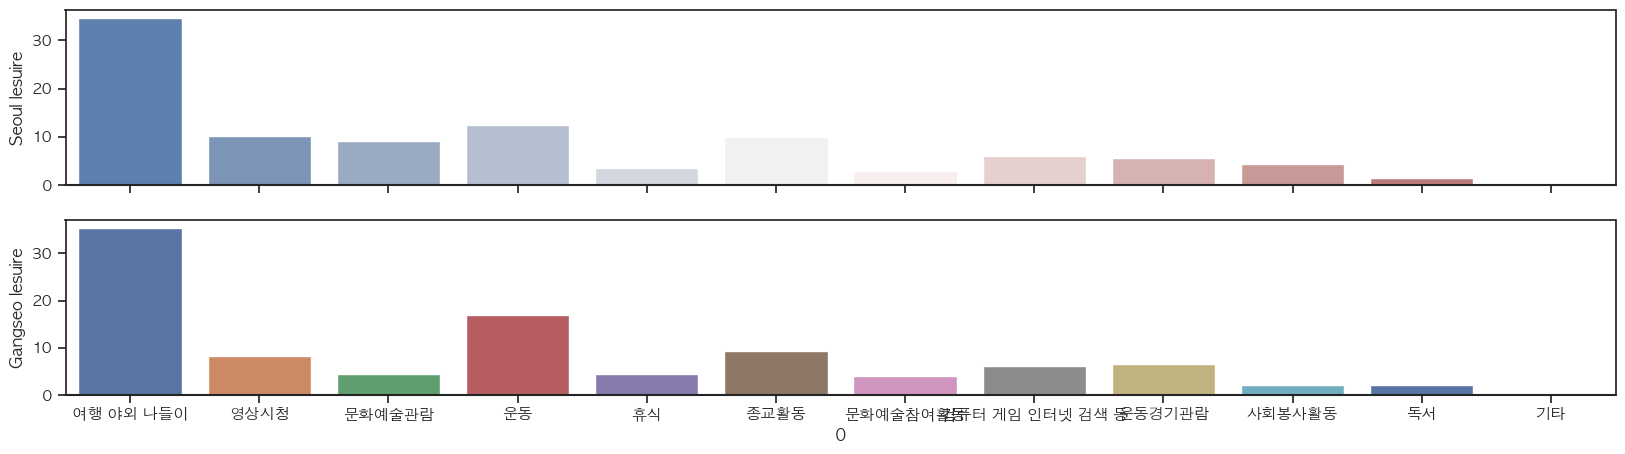

In [40]:
seoul_lesuire = lesuire_df[lesuire_df['구분별(1)'] == '서울시']
columns = seoul_lesuire.columns[2:]
seoul_values = seoul_lesuire.iloc[0,2:].values
gangseo_lesuire = lesuire_df[lesuire_df['구분별(1)'] == '강서구']
ganseo_values = gangseo_lesuire.iloc[0,2:].values


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 5), sharex=True)
plt.rcParams['font.family'] = 'AppleGothic'
sns.barplot(x=columns, y=seoul_values, palette="vlag", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Seoul lesuire")
ax1.set_xlabel("Lesuire type")


sns.barplot(x=columns, y=ganseo_values, palette="deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Gangseo lesuire")



### 서울시민 실제 주말, 휴일 여가활동 

In [41]:
df = pd.read_csv('data/주말휴일여가활동.csv')
df.columns = df.iloc[0]
df =df[1:]
df['기타']= df['기타'].replace('-', 0)

df = df.astype({'여행 야외 나들이':float, '영상시청':float, '문화예술관람':float, '운동':float, '휴식':float, '종교활동':float, '문화예술 참여활동':float, '컴퓨터 게임 인터넷 검색 등':float, '운동경기관람':float, '사회봉사활동':float, '독서':float, '기타': float})
actual_lesuire_df = pd.DataFrame(data = df)
mask = (actual_lesuire_df['구분별(2)'] == '강서구')
actual_lesuire_df.loc[mask,'구분별(1)'] = '강서구'

mask = (lesuire_df['구분별(1)'] == '서울시') | (lesuire_df['세대'] == '강서구')
actual_lesuire_df[mask]
adf = actual_lesuire_df[mask].drop(['구분별(2)'], axis=1)
adf

,구분별(1),영상시청,여행 야외 나들이,컴퓨터 게임 인터넷 검색 등,휴식,사회봉사활동,운동,문화예술관람,문화예술 참여활동,운동경기관람,종교활동,독서,기타
1,서울시,24.7,18.7,10.7,4.0,3.4,13.7,7.4,1.1,3.4,11.3,1.5,0.1
42,강서구,25.7,14.2,12.8,6.6,3.5,16.0,5.6,1.6,3.8,7.7,2.3,0.1


/var/folders/k0/3_5q7r6s2lxfhbpphpjk82hw0000gn/T/ipykernel_4618/2343380589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=adf.iloc[0,1:].values, palette="tab10", ax=ax1)
/var/folders/k0/3_5q7r6s2lxfhbpphpjk82hw0000gn/T/ipykernel_4618/2343380589.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=adf.iloc[1,1:].values, palette="deep", ax=ax2)


Text(0.5, 0, '여가활동')

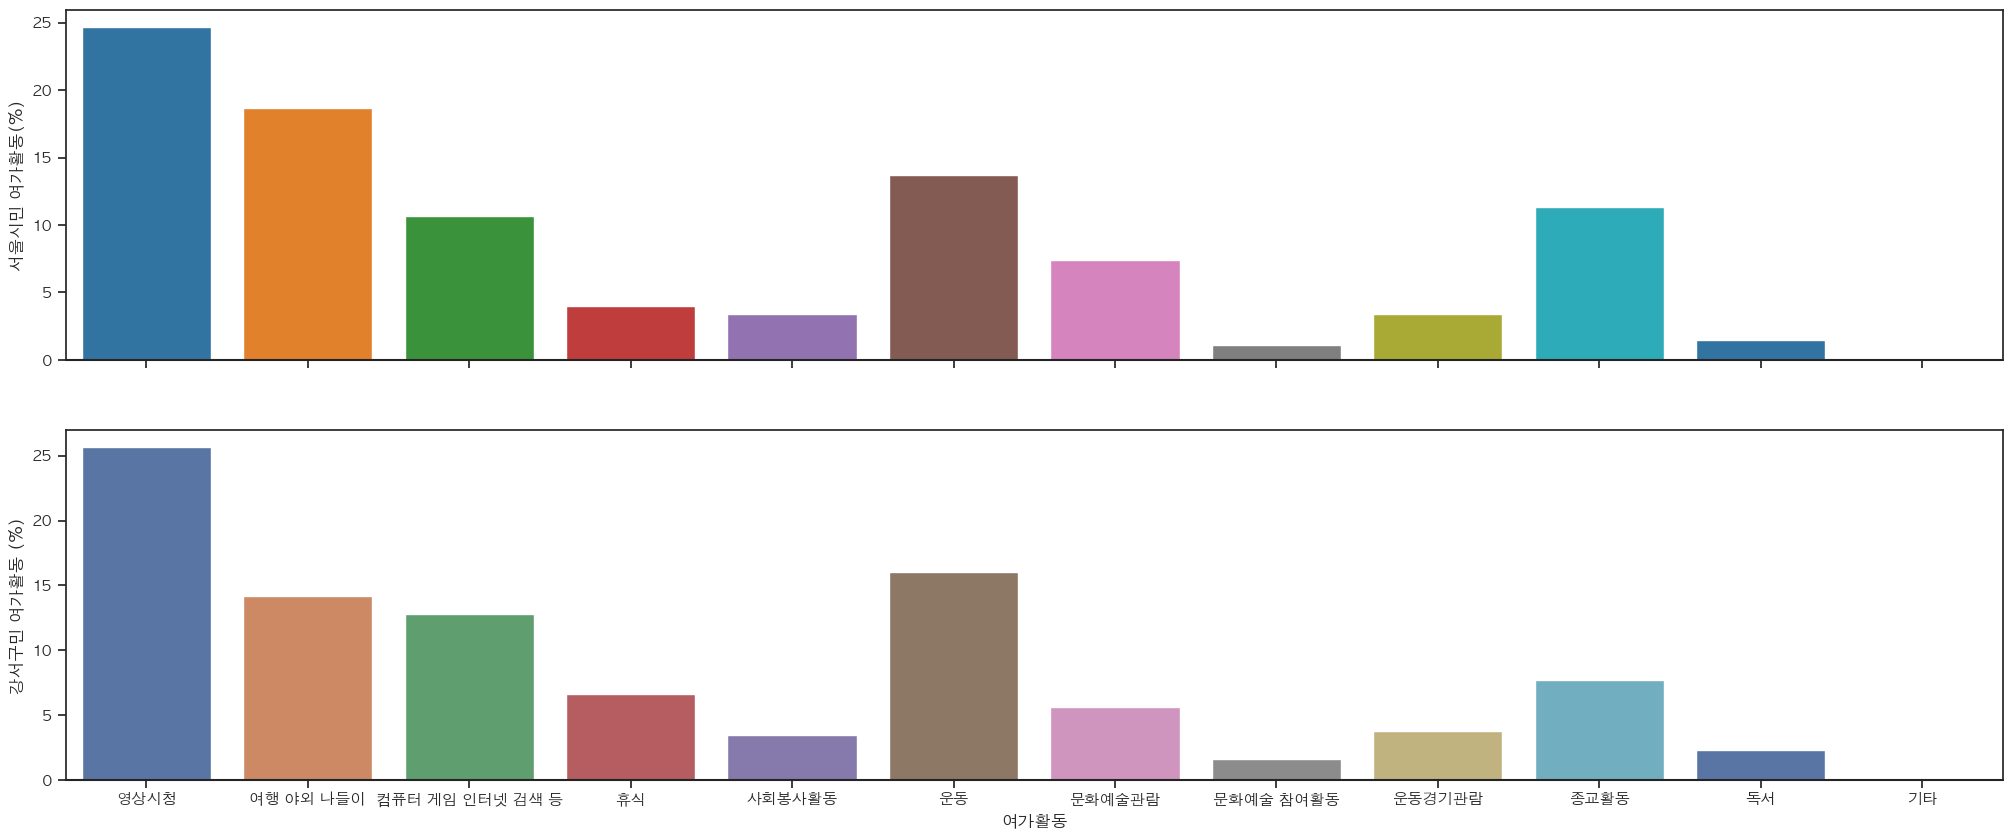

In [42]:
columns = adf.columns[1:]

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10), sharex=True)
sns.barplot(x=columns, y=adf.iloc[0,1:].values, palette="tab10", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("서울시민 여가활동(%)")
ax1.set_xlabel("여가활동")


sns.barplot(x=columns, y=adf.iloc[1,1:].values, palette="deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("강서구민 여가활동 (%)")
ax2.set_xlabel("여가활동")

In [43]:
ldf = lesuire_df[lesuire_df['구분별(1)'] == '강서구']
adf.rename(columns={'문화예술 참여활동': '문화예술참여활동'}, inplace=True)

list  = [ldf, adf]
all_df = pd.concat(list)
all_df = all_df[all_df['구분별(1)'] == '강서구']
all_df.drop(columns='세대')

,구분별(1),여행 야외 나들이,영상시청,문화예술관람,운동,휴식,종교활동,문화예술참여활동,컴퓨터 게임 인터넷 검색 등,운동경기관람,사회봉사활동,독서,기타
42,강서구,35.3,8.3,4.5,16.9,4.4,9.3,4.0,6.1,6.6,2.2,2.2,0.1
42,강서구,14.2,25.7,5.6,16.0,6.6,7.7,1.6,12.8,3.8,3.5,2.3,0.1


/var/folders/k0/3_5q7r6s2lxfhbpphpjk82hw0000gn/T/ipykernel_4618/1315108566.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=all_df.iloc[0,2:].values, palette="tab10", ax=ax1)
/var/folders/k0/3_5q7r6s2lxfhbpphpjk82hw0000gn/T/ipykernel_4618/1315108566.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=all_df.iloc[1,2:].values, palette="deep", ax=ax2)


Text(0.5, 0, '여가활동')

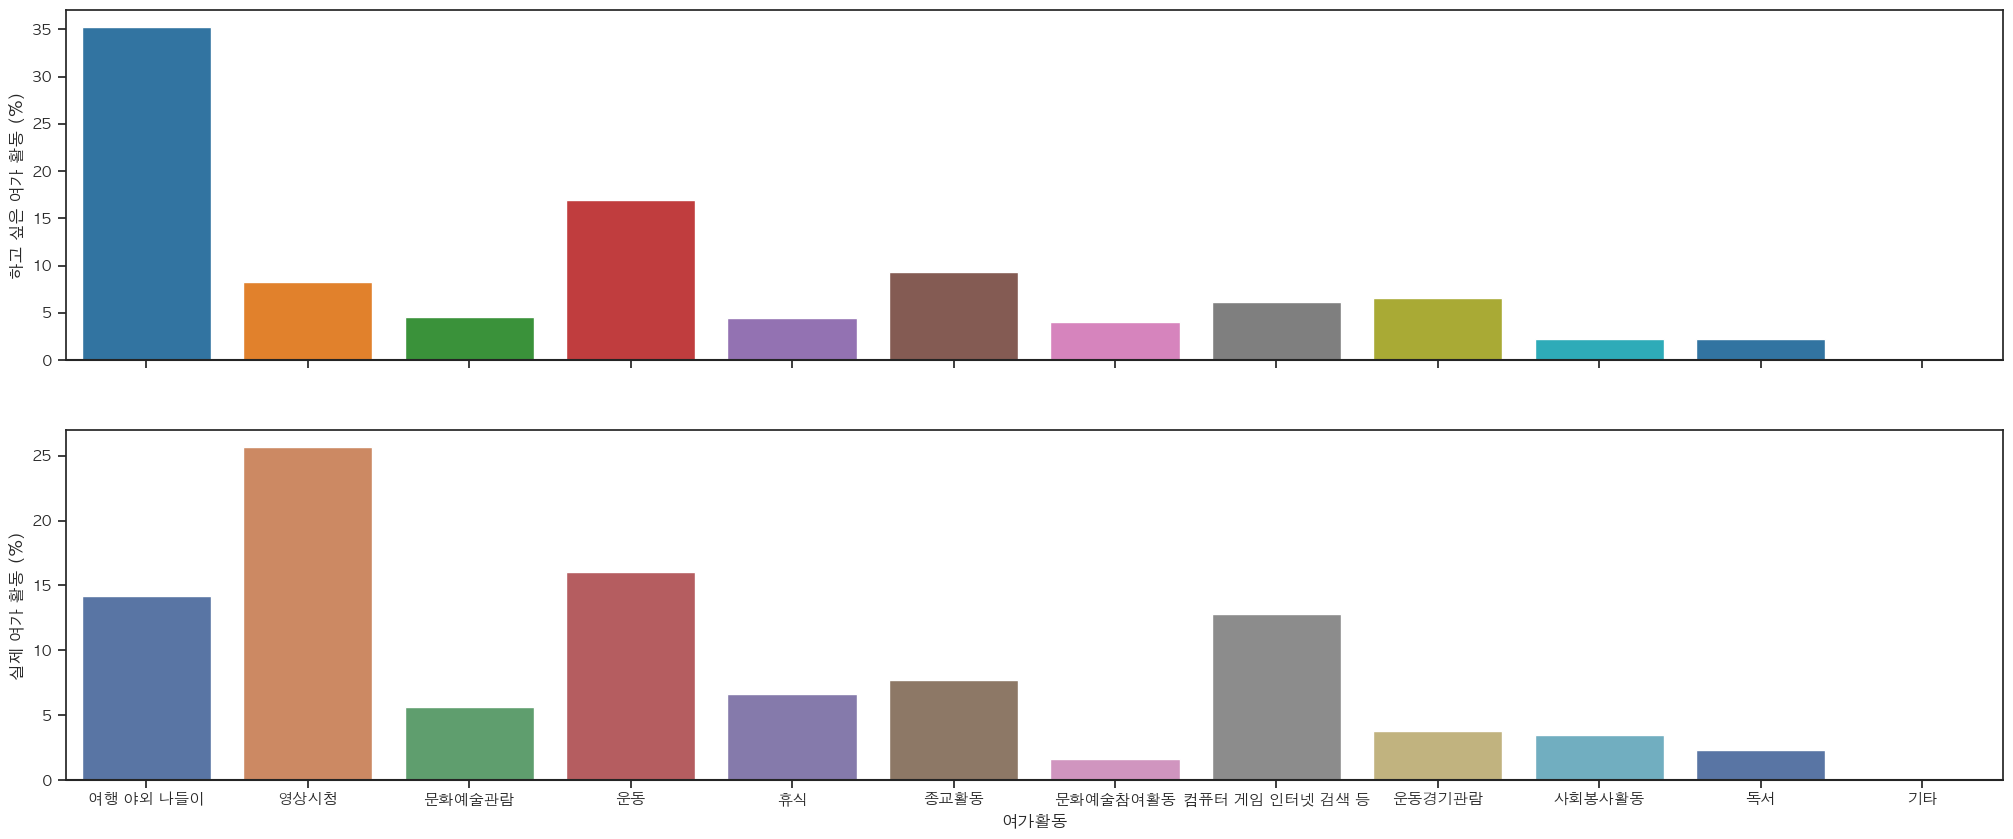

In [44]:
columns = all_df.columns[2:]

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10), sharex=True)
sns.barplot(x=columns, y=all_df.iloc[0,2:].values, palette="tab10", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("하고 싶은 여가 활동 (%)")
ax1.set_xlabel("여가활동")


sns.barplot(x=columns, y=all_df.iloc[1,2:].values, palette="deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("실제 여가 활동 (%)")
ax2.set_xlabel("여가활동")

### 서울시민 상권분석 서비스

In [45]:
com_gu= pd.read_csv('data/서울시 상권분석서비스(소득소비-자치구).csv', encoding='cp949')

In [46]:
total = com_gu[com_gu['기준_년분기_코드'] == 20231].sort_values(by=['월_평균_소득_금액'], ascending=False)[['행정동_코드_명','소득_구간_코드', '월_평균_소득_금액']]
total.reset_index(drop=True)

,행정동_코드_명,소득_구간_코드,월_평균_소득_금액
0,강남구,9,4943841
1,서초구,9,4912401
2,송파구,8,3995905
3,용산구,8,3971498
4,마포구,8,3832436
5,양천구,8,3796034
6,성동구,7,3734499
7,종로구,7,3725859
8,영등포구,7,3604887
9,중구,7,3513603


In [47]:
count = len(total[total['소득_구간_코드'] == 7])

index = [i +1 for i in range(len(total[total['소득_구간_코드'] == 7]))] 
total['월_평균_소득_금액'] = total['월_평균_소득_금액'].apply(lambda d: (format(d, ',')))

total[total['소득_구간_코드'] == 7].sort_values(by=['월_평균_소득_금액'], ascending=False).set_index(pd.Index(index))

,행정동_코드_명,소득_구간_코드,월_평균_소득_금액
1,성동구,7,"3,734,499"
2,종로구,7,"3,725,859"
3,영등포구,7,"3,604,887"
4,중구,7,"3,513,603"
5,동작구,7,"3,454,170"
6,서대문구,7,"3,417,706"
7,강동구,7,"3,292,857"
8,성북구,7,"3,281,773"
9,노원구,7,"3,195,375"
10,광진구,7,"3,192,971"


### 서울시 1인가구 수 

In [48]:
oneperson = pd.read_csv('data/1인세대수.csv', encoding='cp949')

In [49]:
oneperson = oneperson.map(lambda x: x.replace(',','') if type(x) == str else x)
oneperson = oneperson.astype({col: int for col in oneperson.columns[1:]})
oneperson.rename(columns={ col: col.replace('2024년03월_계_','') for col in oneperson.columns[1:]}, inplace=True)
oneperson = oneperson.loc[1:]

In [50]:
old_people =  oneperson['60~69세'] + oneperson['70~79세']+ oneperson['80~89세']+ oneperson['90~99세']+ oneperson['100세 이상']
oneperson['20대'] = round((oneperson['20~29세'] / oneperson['총세대수']) * 100)
oneperson['30대'] = round((oneperson['30~39세'] / oneperson['총세대수']) * 100)
oneperson['40대'] = round((oneperson['40~49세'] / oneperson['총세대수']) * 100)
oneperson['50대'] = round((oneperson['50~59세'] / oneperson['총세대수']) * 100)
oneperson['60대 이상'] = round((old_people / oneperson['총세대수']) * 100)
oneperson[['행정구역', '총세대수', '연령구간세대수', '0~9세', '10~19세', '20~29세', '30~39세',
       '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상', '20대','30대','40대','50대','60대 이상']].sort_values(by='총세대수', ascending=False).reset_index(drop=True)

,행정구역,총세대수,연령구간세대수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상,20대,30대,40대,50대,60대 이상
0,서울특별시 관악구 (1162000000),179528,179528,18,1373,65753,47267,18384,15584,15446,9826,5177,681,19,37.0,26.0,10.0,9.0,17.0
1,서울특별시 강서구 (1150000000),125836,125836,23,305,26231,33464,16276,14200,17460,11082,5783,984,28,21.0,27.0,13.0,11.0,28.0
2,서울특별시 송파구 (1171000000),109151,109151,22,237,19776,30978,16394,13223,14492,9013,4276,718,22,18.0,28.0,15.0,12.0,26.0
3,서울특별시 강남구 (1168000000),97232,97232,25,369,17520,28417,17118,11434,10531,7485,3640,657,36,18.0,29.0,18.0,12.0,23.0
4,서울특별시 영등포구 (1156000000),96724,96724,24,288,23741,27257,11636,11151,11170,6831,3967,636,23,25.0,28.0,12.0,12.0,23.0
5,서울특별시 동작구 (1159000000),89969,89969,13,935,27636,21169,9969,8959,9646,7016,3966,642,18,31.0,24.0,11.0,10.0,24.0
6,서울특별시 은평구 (1138000000),88418,88418,18,314,14954,17789,11513,12434,14741,10009,5837,785,24,17.0,20.0,13.0,14.0,36.0
7,서울특별시 마포구 (1144000000),88235,88235,21,547,23825,23963,11913,9310,8395,5833,3819,591,18,27.0,27.0,14.0,11.0,21.0
8,서울특별시 동대문구 (1123000000),87325,87325,13,1337,25835,15700,9190,10364,11862,7749,4666,591,18,30.0,18.0,11.0,12.0,28.0
9,서울특별시 광진구 (1121500000),85745,85745,8,524,24786,20952,9955,9888,10176,5698,3253,485,20,29.0,24.0,12.0,12.0,23.0


/var/folders/k0/3_5q7r6s2lxfhbpphpjk82hw0000gn/T/ipykernel_4618/210925742.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=culture_info['행정구역별'], y=culture_info['인구십만명당 문화기반시설수'], palette="deep")


<Axes: xlabel='행정구역별', ylabel='인구십만명당 문화기반시설수'>

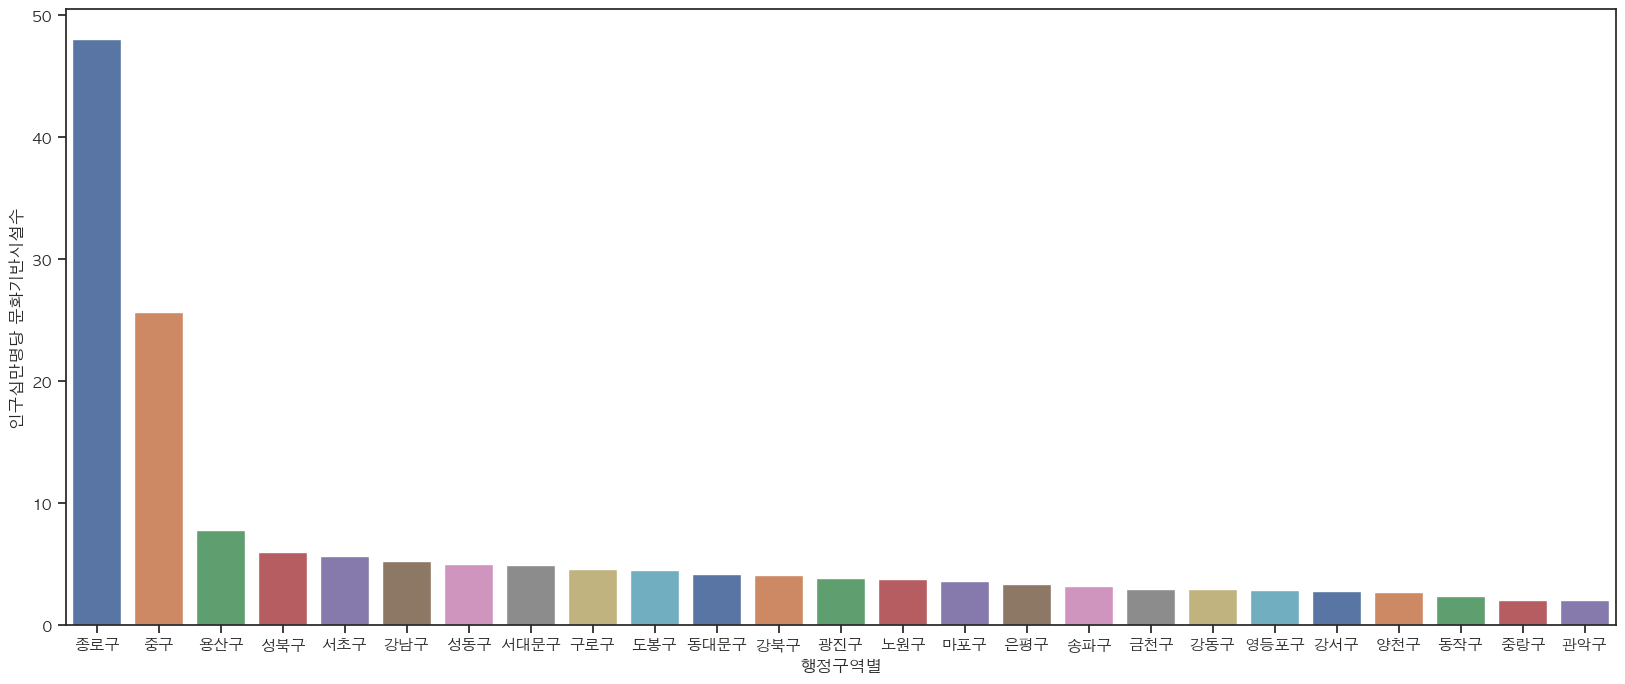

In [53]:
culture_info =pd.read_csv('data/인구_십만명당_문화기반시설수_구.csv', encoding='cp949')
culture_info.columns = culture_info.iloc[0]

culture_info = culture_info.iloc[2:]
culture_info['인구십만명당 문화기반시설수<br>(A÷B×100000) (개)'] = culture_info['인구십만명당 문화기반시설수<br>(A÷B×100000) (개)'].astype(float)
culture_info = culture_info.rename(columns={'인구십만명당 문화기반시설수<br>(A÷B×100000) (개)':'인구십만명당 문화기반시설수'})
culture_info = culture_info.sort_values(by='인구십만명당 문화기반시설수', ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(20, 8))
plt.rcParams['font.family'] = 'AppleGothic'
sns.barplot(x=culture_info['행정구역별'], y=culture_info['인구십만명당 문화기반시설수'], palette="deep")


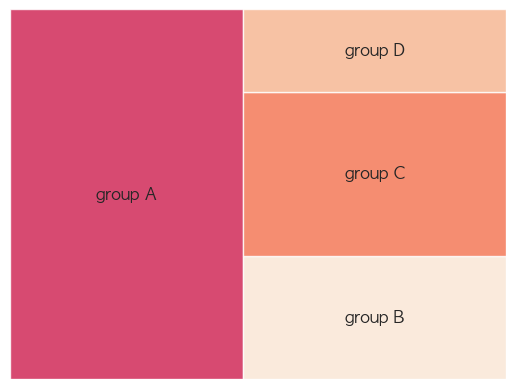

In [54]:
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd

# Create a data frame with fake data
df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

# plot it
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

In [55]:
age_dfs = pd.concat([gangseo_age,dongjak_age, songpa_age, seongdong_age, eunpyeong_age, jongro_age], axis =1, keys=['강서구', '동작구','송파구','성동구','은평구','종로구'])
age_dfs.corr()

,강서구,동작구,송파구,성동구,은평구,종로구
강서구,1.000000,0.976441,0.985831,0.985987,0.975292,0.941294
동작구,0.976441,1.000000,0.952013,0.988039,0.961694,0.983588
송파구,0.985831,0.952013,1.000000,0.974370,0.977175,0.922318
성동구,0.985987,0.988039,0.974370,1.000000,0.976974,0.971056
은평구,0.975292,0.961694,0.977175,0.976974,1.000000,0.959522
종로구,0.941294,0.983588,0.922318,0.971056,0.959522,1.000000


In [56]:
#강서구와 타구 인구 상관도
d = {'행정동_코드_명': ['송파구','성동구',  '동작구', '은평구', '종로구','강서구' ], '인구상관계수':[
   gangseo_age_df['count'].corr(songpa_age_df['count']), 
    gangseo_age_df['count'].corr(seongdong_age_df['count']), 
    gangseo_age_df['count'].corr(dongjak_age_df['count']), 
    gangseo_age_df['count'].corr(eunpyeong_age_df['count']), 
    gangseo_age_df['count'].corr(jongro_age_df['count']),  gangseo_age_df['count'].corr(gangseo_age_df['count'])]}
pd_co = pd.DataFrame(data=d)
pd_co

,행정동_코드_명,인구상관계수
0,송파구,0.985831
1,성동구,0.985987
2,동작구,0.976441
3,은평구,0.975292
4,종로구,0.941294
5,강서구,1.000000


In [66]:


# total['행정동_코드_명'].isin(pd_co['행정동_코드_명'].values)
compared_table = total[total['행정동_코드_명'].isin(pd_co['행정동_코드_명'].values)].merge(pd_co)

compared_table[compared_table['행정동_코드_명'] == '강서구']['월_평균_소득_금액'].iloc[0]

compared_table

,행정동_코드_명,소득_구간_코드,월_평균_소득_금액,인구상관계수
0,송파구,8,"3,995,905",0.985831
1,성동구,7,"3,734,499",0.985987
2,종로구,7,"3,725,859",0.941294
3,동작구,7,"3,454,170",0.976441
4,강서구,7,"3,160,623",1.000000
5,은평구,6,"2,912,739",0.975292


In [67]:
compared_table['소득_구간_코드'].mean(), compared_table['소득_구간_코드'].std(),  compared_table['인구상관계수'].mean(), compared_table['인구상관계수'].std()

(7.0, 0.6324555320336759, 0.9774742694450566, 0.019821918823845333)

In [68]:
#z정규화 

a = (compared_table['소득_구간_코드'] - compared_table['소득_구간_코드'].mean())/ compared_table['소득_구간_코드'].std()
b = (compared_table['인구상관계수'] - compared_table['인구상관계수'].mean())/ compared_table['인구상관계수'].std()
a
#pd.DataFrame([a,b])

0    1.581139
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5   -1.581139
Name: 소득_구간_코드, dtype: float64

In [69]:
compared_table['소득구간코드정규화'] = a
compared_table['인구상관계수정규화'] = b

compared_table

,행정동_코드_명,소득_구간_코드,월_평균_소득_금액,인구상관계수,소득구간코드정규화,인구상관계수정규화
0,송파구,8,"3,995,905",0.985831,1.581139,0.421594
1,성동구,7,"3,734,499",0.985987,0.000000,0.429479
2,종로구,7,"3,725,859",0.941294,0.000000,-1.825254
3,동작구,7,"3,454,170",0.976441,0.000000,-0.052133
4,강서구,7,"3,160,623",1.000000,0.000000,1.136405
5,은평구,6,"2,912,739",0.975292,-1.581139,-0.110091


In [ ]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

compared_table = compared_table[['행정동_코드_명','월_평균_소득_금액','인구상관계수']]
compared_table['월_평균_소득_금액'] = compared_table['월_평균_소득_금액'].apply(lambda x: x.replace(',',''))
compared_table['월_평균_소득_금액'] = compared_table['월_평균_소득_금액'].astype('int')

In [84]:
#강서구
ganseo_val = compared_table.iloc[4][1:].values
ganseo_val
#송파구
values = []
for i in range(6):
       values.append([compared_table.iloc[i][0], cos_sim(ganseo_val, compared_table.iloc[i][1:].values)])
values

/var/folders/k0/3_5q7r6s2lxfhbpphpjk82hw0000gn/T/ipykernel_4618/4184991017.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values.append([compared_table.iloc[i][0], cos_sim(ganseo_val, compared_table.iloc[i][1:].values)])


[['송파구', 0.9999999999999976],
 ['성동구', 0.9999999999999986],
 ['종로구', 0.9999999999999979],
 ['동작구', 0.9999999999999994],
 ['강서구', 1.0],
 ['은평구', 0.9999999999999996]]